# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Data Visualization - Question 1

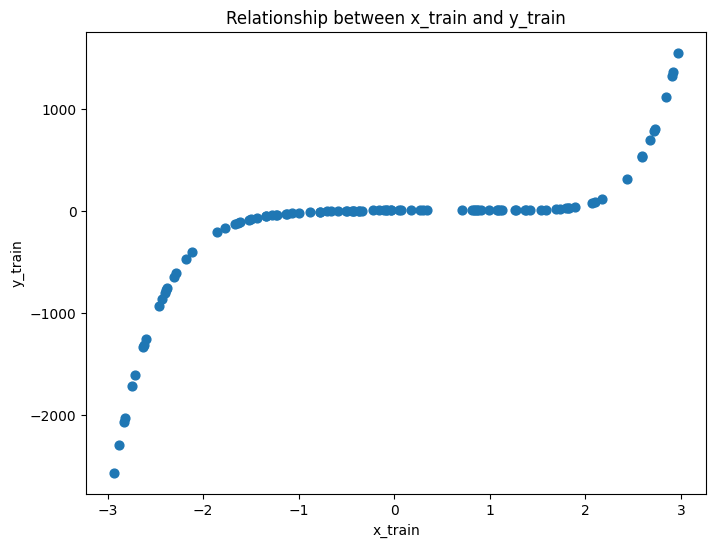

In [2]:
"""
Plot the relationship between x_train.npy and y_train.npy
"""

x_train = np.load("data/x_train.npy")
y_train = np.load("data/y_train.npy")
x_test  = np.load("data/x_test.npy")
y_test  = np.load("data/y_test.npy")

plt.figure(figsize=(8, 6))
plt.scatter(x_train, y_train, s=40)
plt.title("Relationship between x_train and y_train")
plt.xlabel("x_train")
plt.ylabel("y_train")
plt.show()

# Linear Regression definition and implementation

Closed form (least-squares solution):

$$
\theta = (X^T X)^{-1} X^T y
$$

- $X \in \mathbb{R}^{n \times d}$ — feature matrix (rows = samples, cols = features + bias)
- $y \in \mathbb{R}^{n}$ — targets
- $\theta \in \mathbb{R}^{d}$ — weights



In [ ]:
def add_bias(x):
    return np.hstack([x.reshape(-1, 1), np.ones((len(x), 1))])

def fit(X, y):
    return np.linalg.solve(X.T @ X, X.T @ y)

def predict(X, theta):
    return X @ theta

In [4]:
# Training

X = add_bias(x_train)
theta = fit(X, y_train)

yhat = predict(X, theta)

print("Theta: ", theta)
print("yhat: ", yhat)
print("MSE: ", np.mean((y_train - yhat)**2))

Theta:  [ 300.61954771 -106.17379612]
yhat:  [ 771.23964588  768.00224098 -131.7117938  -257.91909513  432.99446247
 -477.54282649  219.22174242  699.56308426  514.96588608 -508.98219905
  625.30642188 -665.41461952 -476.40978254  319.93750769 -155.82344757
  712.13824285 -115.39371316 -447.52441485 -172.0579877   148.93181806
  -90.17439847 -824.4208278  -234.10822232 -597.29474889 -742.76484633
  137.3755382   749.83358155  786.18094604 -847.40608218  145.69866646
 -217.40467872 -318.83865795 -558.32168222 -800.52775618  441.31075912
  166.5464429  -304.24623133 -235.60657979 -218.59232761 -986.75069384
 -820.81490011 -118.03901921 -283.08093891 -429.10451443  404.01798479
  354.9316134   714.21502686 -339.78195481  154.41920908 -895.49162053
  306.11515239  674.05459039 -563.38152054  -26.23882537  274.67445774
 -372.06963363 -130.50860947   -3.87078192 -209.21961503  674.17694776
 -538.22618943  233.04785075  546.66975752  370.59196513  413.94257507
  461.36070878 -593.0386139   52

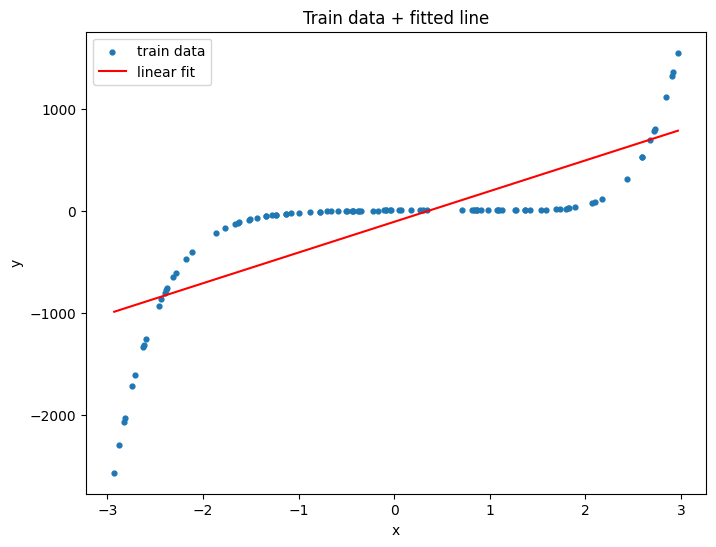

In [8]:
order = np.argsort(x_train)

plt.figure(figsize=(8, 6))
plt.scatter(x_train, y_train, s=12, label="train data")
plt.plot(x_train[order], yhat[order], label="linear fit", color="r")
plt.title("Train data + fitted line")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


In [6]:
X_test = add_bias(x_test)
yhat_test = predict(X_test, theta)

print("Test MSE:", np.mean((y_test - yhat_test)**2))

Test MSE: 35281.33990446923


So the error is dreadful, and we will need to implement polynomial linear regression in order to have it truly fit to the training data.

Pretty simple though, just build a new feature matrix (X) where each column is a power of (x) (basis functions; feature map), then run the exact same normal-equation solve on that (X).
 

In [9]:
def poly_X(x, degree):
    x = x.reshape(-1, 1)
    X = np.hstack([x**k for k in range(1, degree + 1)])   
    return np.hstack([X, np.ones((len(x), 1))])        


In [17]:
degree = 9 
X = poly_X(x_train, degree)
theta = fit(X, y_train)

yhat = predict(X, theta)

print("degree:", degree)
print("theta:", theta)
print("train mse:", np.mean((y_train - yhat)**2))


degree: 9
theta: [ 1.00000000e+01  2.73674383e-11  4.00000000e+00 -8.00000000e+00
  2.23343860e-11  3.70784661e-12  1.00000000e+00 -2.32104355e-13
  2.44207229e-13  6.00000000e+00]
train mse: 1.9350679469432354e-22


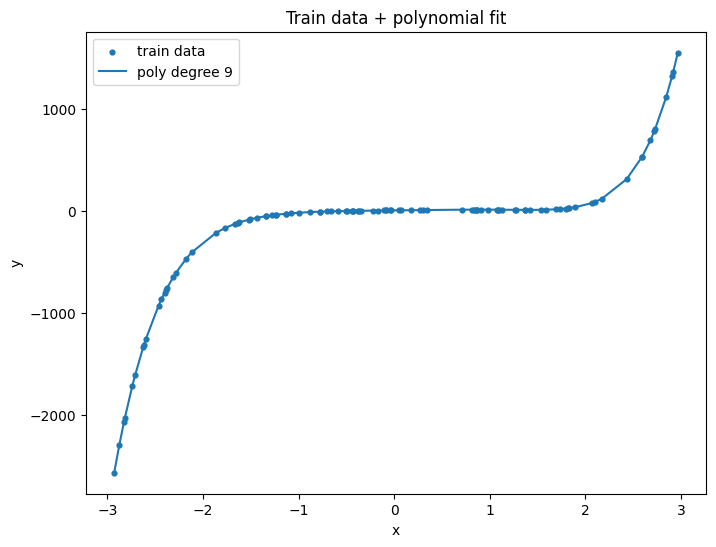

In [ ]:
order = np.argsort(x_train)

plt.figure(figsize=(8, 6))
plt.scatter(x_train, y_train, s=12, label="train data")
plt.plot(x_train[order], yhat[order], label=f"poly degree {degree}", color="red")
plt.title("Train data + polynomial fit")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()
